# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 651


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 0
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count+1} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = (city_weather["main"]["temp_max"]- 273.15) * 9/5 + 32
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | santa marta
Processing Record 4 of Set 1 | nikolsk
Processing Record 5 of Set 1 | jarwal
Processing Record 6 of Set 1 | porto novo
Processing Record 7 of Set 1 | vostok
Processing Record 8 of Set 1 | grindavik
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | harper
Processing Record 12 of Set 1 | bengkulu
Processing Record 13 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 14 of Set 1 | sovetskiy
Processing Record 15 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 16 of Set 1 | sao filipe
Processing Record 17 of Set 1 | saint anthony
Processing Record 18 of Set 1 | kaitangata
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | raudeberg
Processing Record

In [103]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          600
Lat           600
Lng           600
Max Temp      600
Humidity      600
Cloudiness    600
Wind Speed    600
Country       600
Date          600
dtype: int64

In [104]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,66.020,67,94,4.38,AU,1681610152
1,santa marta,11.2408,-74.1990,86.054,58,40,5.14,CO,1681609615
2,nikolsk,53.7189,46.0712,29.750,54,0,2.24,RU,1681609842
3,jarwal,27.1667,81.5500,88.358,13,0,1.71,IN,1681609842
4,porto novo,6.4965,2.6036,75.020,87,100,2.22,BJ,1681609842


In [105]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [106]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,66.020,67,94,4.38,AU,1681610152
1,santa marta,11.2408,-74.1990,86.054,58,40,5.14,CO,1681609615
2,nikolsk,53.7189,46.0712,29.750,54,0,2.24,RU,1681609842
3,jarwal,27.1667,81.5500,88.358,13,0,1.71,IN,1681609842
4,porto novo,6.4965,2.6036,75.020,87,100,2.22,BJ,1681609842


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

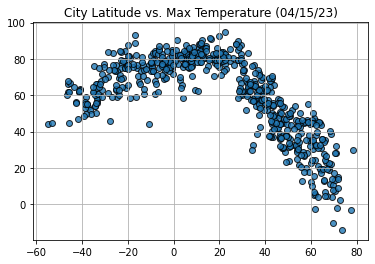

In [107]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

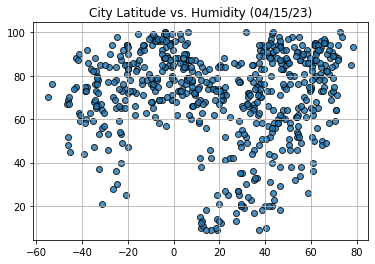

In [108]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

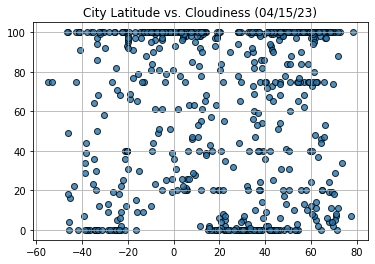

In [109]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

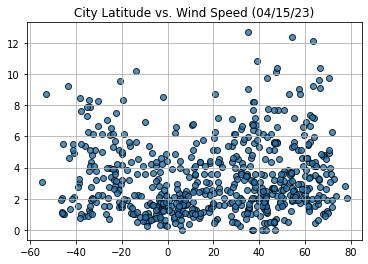

In [110]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [111]:
# Define a function to create Linear Regression plots for each relationship above 
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
        
        # Run regression on hemisphere weather data
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
        
        # Calculate the regression line "y values" from the slope and intercept
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        
        # Create a scatter plot and plot the regression line
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
                
        # Annotate the text for the line equation
        # plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.annotate(line_eq, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=15, color='red', xytext=(10, 40), textcoords='offset pixels', ha='left', va='bottom')
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.title(title)
        plt.show()
        
        return r_value

In [112]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,santa marta,11.2408,-74.1990,86.054,58,40,5.14,CO,1681609615
2,nikolsk,53.7189,46.0712,29.750,54,0,2.24,RU,1681609842
3,jarwal,27.1667,81.5500,88.358,13,0,1.71,IN,1681609842
4,porto novo,6.4965,2.6036,75.020,87,100,2.22,BJ,1681609842
5,vostok,46.4856,135.8833,38.804,38,100,5.57,RU,1681610153


In [113]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,66.020,67,94,4.38,AU,1681610152
7,vaini,-21.2000,-175.2000,84.362,74,40,5.14,TO,1681610154
8,ushuaia,-54.8000,-68.3000,44.258,70,75,3.09,AR,1681609880
10,bengkulu,-3.8004,102.2655,78.278,84,100,1.93,ID,1681610154
14,kaitangata,-46.2817,169.8464,61.934,69,49,2.05,NZ,1681609579


###  Temperature vs. Latitude Linear Regression Plot

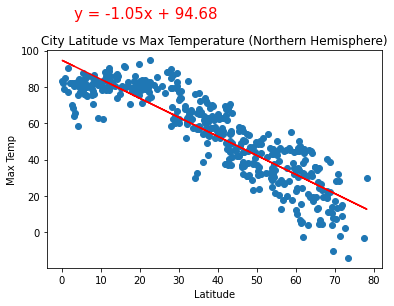

The r-value is: -0.8857009533386677


In [114]:
# Linear regression on Northern Hemisphere for temperature vs latitude and create a scatter plot with the linear regression line
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
r_value = plot_linear_regression(x_values, y_values, 'City Latitude vs Max Temperature (Northern Hemisphere)', 'Max Temp', (10,40))
print(f"The r-value is: {r_value}")


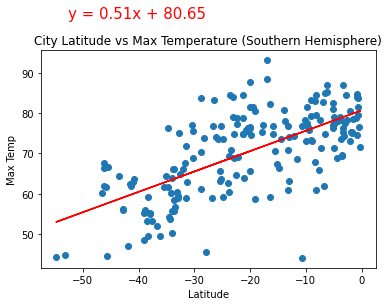

0.6657746086828437

In [115]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'City Latitude vs Max Temperature (Southern Hemisphere)', 'Max Temp', (-50,90))

**Discussion about the linear relationship:** There is a relatively strong negative correlation between the latitude and temperaturefor the Northern Hemisphere and a positive correlation for the Southern Hemisphere. Visualizing the linear relationship between the two suggests that the temperature decreases as we move further away from the equator. 

### Humidity vs. Latitude Linear Regression Plot

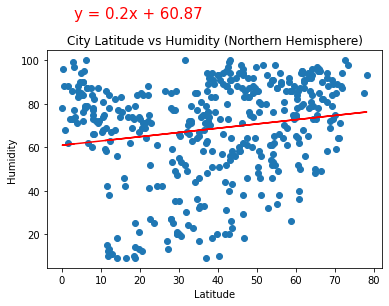

The r-value is: 0.17346302718382553


In [116]:
# Northern Hemisphere - humidity (%) vs. latitude regression plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
r_value = plot_linear_regression(x_values, y_values, 'City Latitude vs Humidity (Northern Hemisphere)', 'Humidity', (10,40))
print(f"The r-value is: {r_value}")

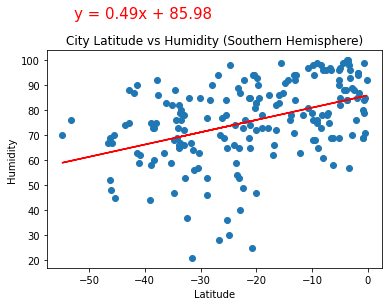

The r-value is: 0.4198906545348758


In [117]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
r_value = plot_linear_regression(x_values, y_values, 'City Latitude vs Humidity (Southern Hemisphere)', 'Humidity', (10,40))
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** There is a weak positive correlation in the Northern Hemisphere indicates that Humidity increases slightly as latitude increases. The postive correlation is greater in the Southern Hemisphere indicating that humidity increases moderately as we move closer to the equator. 

### Cloudiness vs. Latitude Linear Regression Plot

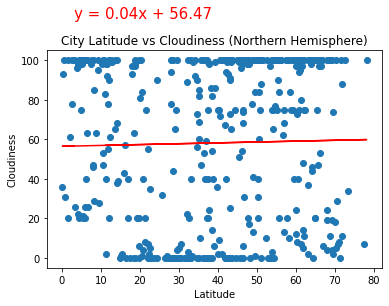

The r-value is: 0.021832227755421416


In [118]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
r_value = plot_linear_regression(x_values, y_values, 'City Latitude vs Cloudiness (Northern Hemisphere)', 'Cloudiness', (10,40))
print(f"The r-value is: {r_value}")

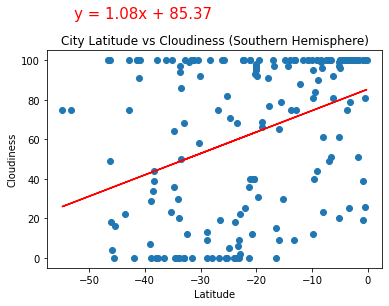

The r-value is: 0.3765074499352147


In [119]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
r_value = plot_linear_regression(x_values, y_values, 'City Latitude vs Cloudiness (Southern Hemisphere)', 'Cloudiness', (10,40))
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** There is a very weak correlation between cloudiness and city latitude in the Northern Hemisphere. However, there is a stronger positive correlation in the Southern Hemisphere indicating that cloudiness moderately increases as we approach the equator. 

### Wind Speed vs. Latitude Linear Regression Plot

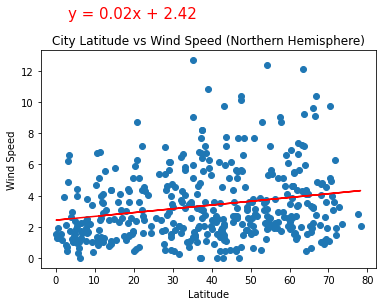

The r-value is: 0.21196253592369926


In [120]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
r_value = plot_linear_regression(x_values, y_values, 'City Latitude vs Wind Speed (Northern Hemisphere)', 'Wind Speed', (10,40))
print(f"The r-value is: {r_value}")

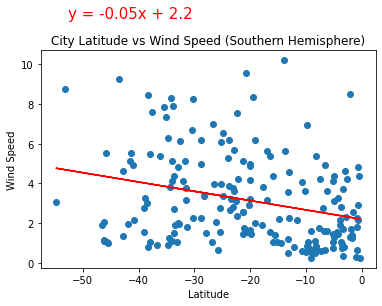

The r-value is: -0.28506106412824284


In [121]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
r_value = plot_linear_regression(x_values, y_values, 'City Latitude vs Wind Speed (Southern Hemisphere)', 'Wind Speed', (10,40))
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** There is a positive correlations between wind speed and latitude in the northern hemisphere but this relationship is weak. On the other hand, there is a stronger negative correlation in the Southern Hemisphere indicating that the wind speed is likely to get faster as we move further south from the equator. 